In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def planck(wavelength, temperature):
    """
    Calculates the spectral radiance of blackbody radiation at a given temperature and wavelength using the Planck function.

    Parameters:
    wavelength (float): The wavelength in meters.
    temperature (float): The temperature in Kelvin.

    Returns:
    float: The spectral radiance in watts per steradian per square meter per meter.
    """
    h = 6.62607015e-34 # Planck constant in joule seconds
    c = 299792458 # Speed of light in meters per second
    k = 1.380649e-23 # Boltzmann constant in joules per kelvin

    a = 2*h*c**2 / wavelength**5
    b = h*c / (wavelength*k*temperature)

    spectral_radiance = a / (np.exp(b) - 1)

    return spectral_radiance

In [3]:
x = np.linspace(100,9000,10000)*10**-10 # Genero un array entre 100 y 9000 Angstron
x2= np.linspace(100,9000,10000)  # Es el mismo array pero en metros, solo se usa para graficar

In [4]:
#Uso datos de mi sistema que tengo mas en mente,
#en la primera aproximación consideramos R1=R2, aunque no entran en las cuentas
t1=35000
t2=29000
p1=planck(x,t1)
p2=planck(x,t2)
l1=t1**4
l2=t2**4
p3=p1/(p1+p2) #p3 es el factor de dilución intervalo a intervalo (el intervalo será (9000-100)/10000 Å de ancho)
#x3=np.ma.masked_outside(x2,3000,9000) # x3 es una mascara que solo genera el factor en el visible
#p4=p3[np.ma.getmask(x3)] 
#x3=x3[x3.mask == False] #convierte el array enmascarado en un array normal

A pesar de las distintas cuentas que hacemos, el factor de dilución lo conocemos como "el cociente de flujos"

La distribución de flujo de energía esta dado por la planckiana:

B(λ, T) = (2hc^2/λ^5) × (1/(exp(hc/λkT) - 1))

En watts por steradianes por metro² por meter

El cociente de flujos, entendiendo que tiene que estar entre 0 y 1, y tomando a la más caliente como numerador es:

F1 / (F1 + F2)

Aplicado a intervalos de energía de las planckianas este es un valor que va a cambiar todo el tiempo., especialmente en longitudes de onda más corta.

Aún así, lo asumimos constante.

El cálculo que he hecho yo para obtener ese valor es L1/(L1 + L2)

Re-viendo esta formulación, el error aparece porque el al flujo y la luminosidad los separa el factor cociente de radios.

L = 4 pi sigma T^4 R^2
si 4 pi R^2 es el área, sigma T^4 es la energía total irradiada (que lo es)

Entonces, el cociente de flujos para toda la distribución es:
    ( T1^4 / (T1^4 + T2^4 )
     
Como esto considera todas las longitudes de onda, la contribución de fotones energéticos es preponderante. Es un error considerarlo constante para toda la distribucion.
En la segunda figura vemos la fracción de flujo para cada intervalo de lambda, y la fracción de flujo integrado.
En este caso en particular, y sin haber buscado donde se igualan funcionalmente, los 2 solo son iguales ~3600 Å.
     
Ahora bien, la interpretación que me parece correcta es considerarlo constante en el rango óptico. (ver Fig 3). Pero no tenemos una forma de estimarlo del todo. Al ser tán poca la diferencia ~0.1(para este caso) se puede usar el cociente total de flujos como cota superior del factor de dilución en el óptico.

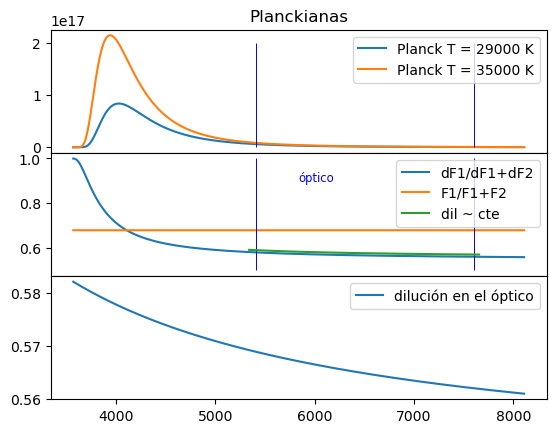

In [5]:
fig,ax = plt.subplots(3,1,gridspec_kw={"hspace":0., 'wspace': 0.05})

ax[0].set_title("Planckianas")
ax[0].plot(x2,p2,label="Planck T = 29000 K")
ax[0].plot(x2,p1,label="Planck T = 35000 K")
ax[0].set_xlabel("Angstrong")
ax[0].legend()
ax[0].vlines(3700,0.,2e17,color = 'blue',linewidth = 0.7)
ax[0].vlines(8000,0.,2e17,color = 'blue',linewidth = 0.7)

ax[1].plot(x2,p3,label="dF1/dF1+dF2")
ax[1].plot(x2,np.ones_like(x2)*(l1/(l1+l2)),label="F1/F1+F2")
ax[1].vlines(3700,0.5,1,color = 'blue',linewidth = 0.7)
ax[1].vlines(8000,0.5,1,color = 'blue',linewidth = 0.7)
ax[1].annotate("óptico", xy=(4548, 0.9),color='blue',fontsize='small')

ax[1].plot(x2[3900:9000],p3[3900:9000]+0.01,label="dil ~ cte")
ax[1].legend()

ax[2].plot(x2[3900:9000],p3[3900:9000],label="dilución en el óptico")
ax[2].legend()


Por último y mayor de mis errores, en algún momento usé el cociente de luminosidades para estimar el factor de dilución.
Esto es mucho pero porque involucra el cociente de radios al cuadrado. Esto da una diferencia de 0.3 en el cálculo.

In [6]:
q = 2 #cociente de radios para mi sistema
pp = l1 * q**2/(l1*q**2+l2)

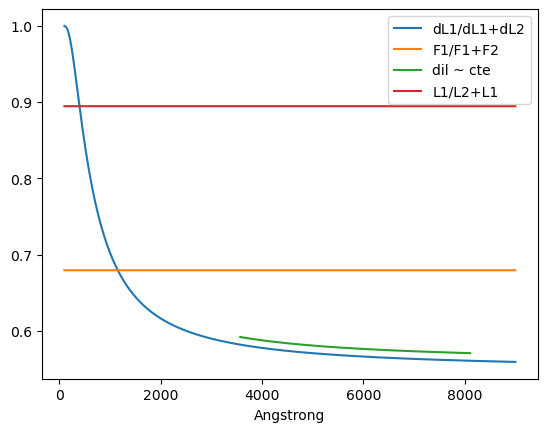

In [7]:
fig,ax = plt.subplots()
ax.plot(x2,p3,label="dL1/dL1+dL2")
ax.plot(x2,np.ones_like(x2)*(l1/(l1+l2)),label="F1/F1+F2")
ax.plot(x2[3900:9000],p3[3900:9000]+0.01,label="dil ~ cte")
ax.plot(x2,np.ones_like(x2)*pp,label="L1/L2+L1")


ax.legend()
ax.set_xlabel("Angstrong")
ax.legend()

La representacion correcta si hablamos de cociente de flujos es la línea azul de la primer figura, el cociente de luminosidades queda muy atado al cociente de radios

Despues lo completo con el análisis para líneas espectrales.